### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ
#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

# ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 7
# Регрессия
### Дисциплина: Интеллектуальный анализ данных

##### Студент:  Пономарева Л. М.
##### Группа:   НПИбд-02-19

### Москва 2022

#### Вариант 18 

Cylinder Bands Data Set 

Название файла: bands.data 

Ссылка: http://archive.ics.uci.edu/ml/datasets/Cylinder+Bands 

Класс: band type (столбец No 40) 

Зависимая переменная: press speed (столбец No 29) 

Метод обработки пропущенных значений – медиана класса 

Метод обработки выбросов – алгоритм кластеризации OPTICS 

Метод снижения размерности данных – линейная регрессия (LinearRegression) 

Регрессоры: 

- Полиномиальная регрессия (PolynomialFeatures+LinearRegression), параметр degree в диапазоне от 2 до 5 

- Регрессия эластичная сеть (ElasticNet), параметры alpha в диапазоне от 0.5 до 1.5, l1_ratio от 0.5 до 1.5 

- Регрессии на основе метода опорных векторов (SVR), параметр degree в диапазоне от 1 до 5 

Показатели качества регрессии: 

- Для определения лучшего регрессора MSPE 

- Для визуализации кривой обучения MSLE 

#### Задание 1.
Считайте заданный набор данных из репозитария UCI, включая указанный в индивидуальном задании столбец с метками классов и столбец с откликом (зависимой переменной).

In [1]:
import pandas as pd

# считываем данные в объект DataFrame
my_data = pd.read_csv( "https://archive.ics.uci.edu/ml/machine-learning-databases/cylinder-bands/bands.data", header=None)
my_data

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,19910108,X126,TVGUIDE,25503,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,36.4,0,0,2.5,1,34,40,105,100,band
1,19910109,X266,TVGUIDE,25503,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,38.5,0,0,2.5,0.7,34,40,105,100,noband
2,19910104,B7,MODMAT,47201,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,39.8,0,0,2.8,0.9,40,40,103.87,100,noband
3,19910104,T133,MASSEY,39039,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,38.8,0,0,2.5,1.3,40,40,108.06,100,noband
4,19910111,J34,KMART,37351,NO,KEY,YES,BENTON,GALLATIN,UNCOATED,...,42.5,5,0,2.3,0.6,35,40,106.67,100,noband
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,19941005,aa66,kmart,85813,?,key,?,?,gallatin,super,...,?,?,?,1,1,?,40,112.5,100,band
537,19941009,j44,best,38064,?,key,?,?,gallatin,super,...,?,?,?,0,0,?,40,110,100,band
538,19941009,aa58,kmart,85814,?,key,?,?,gallatin,super,...,?,?,?,2.7,2.8,?,40,108,100,band
539,19941010,aa70,kmart,85814,?,key,?,?,gallatin,super,...,?,?,?,1.5,2.3,?,40,108,100,band


#### Задание 2.	
Преобразуйте в числовые признаки неправильно распознанные признаки с числовыми значениями. Если в столбцах с метками классов и откликом имеются пропущенные значения, то удалите записи с пропущенными значениями. Оставьте в наборе данных только числовые признаки. 


In [2]:
my_data[39].unique()

array(['band', 'noband', nan], dtype=object)

In [3]:
my_data[39].isnull().sum(axis=0)

2

In [4]:
my_data = my_data.dropna()
new_index = [i for i in range(len(my_data))]
my_data = my_data.reset_index(drop=True)
my_data

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,19910108,X126,TVGUIDE,25503,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,36.4,0,0,2.5,1,34,40,105,100,band
1,19910109,X266,TVGUIDE,25503,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,38.5,0,0,2.5,0.7,34,40,105,100,noband
2,19910104,B7,MODMAT,47201,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,39.8,0,0,2.8,0.9,40,40,103.87,100,noband
3,19910104,T133,MASSEY,39039,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,38.8,0,0,2.5,1.3,40,40,108.06,100,noband
4,19910111,J34,KMART,37351,NO,KEY,YES,BENTON,GALLATIN,UNCOATED,...,42.5,5,0,2.3,0.6,35,40,106.67,100,noband
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,19941005,aa66,kmart,85813,?,key,?,?,gallatin,super,...,?,?,?,1,1,?,40,112.5,100,band
535,19941009,j44,best,38064,?,key,?,?,gallatin,super,...,?,?,?,0,0,?,40,110,100,band
536,19941009,aa58,kmart,85814,?,key,?,?,gallatin,super,...,?,?,?,2.7,2.8,?,40,108,100,band
537,19941010,aa70,kmart,85814,?,key,?,?,gallatin,super,...,?,?,?,1.5,2.3,?,40,108,100,band


In [5]:
import numpy as np
my_data = my_data.replace('?', np.NaN)

In [6]:
print('Число записей = %d' % (my_data.shape[0]))
print('Число признаков = %d' % (my_data.shape[1]))

print('Число пропущенных значений:')
for col in my_data.columns:
    print('\t%s: %d' % (col,my_data[col].isna().sum()))

Число записей = 539
Число признаков = 40
Число пропущенных значений:
	0: 0
	1: 0
	2: 0
	3: 0
	4: 48
	5: 0
	6: 56
	7: 59
	8: 0
	9: 0
	10: 0
	11: 24
	12: 54
	13: 18
	14: 0
	15: 0
	16: 0
	17: 3
	18: 155
	19: 18
	20: 54
	21: 5
	22: 27
	23: 2
	24: 1
	25: 30
	26: 63
	27: 55
	28: 10
	29: 55
	30: 55
	31: 56
	32: 54
	33: 6
	34: 7
	35: 54
	36: 7
	37: 7
	38: 3
	39: 0


In [7]:
for col in my_data:
    if my_data[col].dtypes == 'O':
        my_data[col] = my_data[col].str.lower()

Запомним индексы колонок с нечисловыми значениями и без пропущенных значений (иначе мы их затрем):

In [8]:
columns1 = [1, 2, 5, 8, 9, 14, 39]

Заменим нечисловые признаки числовыми:

In [9]:
for col in columns1:
    myList = my_data[col].unique()
    myDict = {myList[i]: i for i in range(0, len(myList), 1)} 
    my_data = my_data.replace(myDict)

In [10]:
my_data

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,19910108,0,0,25503,yes,0,yes,benton,0,0,...,36.4,0,0,2.5,1,34,40,105,100,0
1,19910109,1,0,25503,yes,0,yes,benton,0,0,...,38.5,0,0,2.5,0.7,34,40,105,100,1
2,19910104,2,1,47201,yes,0,yes,benton,0,0,...,39.8,0,0,2.8,0.9,40,40,103.87,100,1
3,19910104,3,2,39039,yes,0,yes,benton,0,0,...,38.8,0,0,2.5,1.3,40,40,108.06,100,1
4,19910111,4,3,37351,no,0,yes,benton,0,0,...,42.5,5,0,2.3,0.6,35,40,106.67,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,19941005,425,3,85813,NaN,0,NaN,NaN,0,2,...,NaN,NaN,NaN,1,1,NaN,40,112.5,100,0
535,19941009,426,70,38064,NaN,0,NaN,NaN,0,2,...,NaN,NaN,NaN,0,0,NaN,40,110,100,0
536,19941009,400,3,85814,NaN,0,NaN,NaN,0,2,...,NaN,NaN,NaN,2.7,2.8,NaN,40,108,100,0
537,19941010,427,3,85814,NaN,0,NaN,NaN,0,2,...,NaN,NaN,NaN,1.5,2.3,NaN,40,108,100,0


Сделаем тоже самое с признаками с пропущенныеми значениями, но поотдельности:

In [11]:
columns2 = [4, 6, 7, 10, 11, 12, 13, 17, 18, 19]
for i in columns2:
    print(my_data[i].unique())

['yes' 'no' nan]
['yes' 'no' nan]
['benton' nan 'uddeholm']
[0 1 'cover']
['no' 'yes' nan]
['line' 'xylol' 'naptha' nan]
['yes' 'no' nan]
['tabloid' 'catalog' 'spiegel' nan]
['northus' nan 'canadian' 'scandanavian' 'southus' 'mideuropean']
['1911' nan '1910']


In [12]:
dict1 = {'yes':1, 'no':0}
dict2 = {'benton':1, 'uddeholm':0}
dict3 = {'cover':2}
dict4 = {'line':0, 'xylol':1, 'naptha':2}
dict5 = {'tabloid':1, 'catalog':2, 'spiegel':3}
dict6 = {'northus':1, 'canadian':2, 'scandanavian':3, 'southus':4, 'mideuropean':5}
dict7 = {'1911':1, '1910':0}

In [13]:
my_data = my_data.replace(dict1)
my_data = my_data.replace(dict2)
my_data = my_data.replace(dict3)
my_data = my_data.replace(dict4)
my_data = my_data.replace(dict5)
my_data = my_data.replace(dict6)
my_data = my_data.replace(dict7)
my_data

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,19910108,0,0,25503,1.0,0,1.0,1.0,0,0,...,36.4,0,0,2.5,1,34,40,105,100,0
1,19910109,1,0,25503,1.0,0,1.0,1.0,0,0,...,38.5,0,0,2.5,0.7,34,40,105,100,1
2,19910104,2,1,47201,1.0,0,1.0,1.0,0,0,...,39.8,0,0,2.8,0.9,40,40,103.87,100,1
3,19910104,3,2,39039,1.0,0,1.0,1.0,0,0,...,38.8,0,0,2.5,1.3,40,40,108.06,100,1
4,19910111,4,3,37351,0.0,0,1.0,1.0,0,0,...,42.5,5,0,2.3,0.6,35,40,106.67,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,19941005,425,3,85813,NaN,0,NaN,NaN,0,2,...,NaN,NaN,NaN,1,1,NaN,40,112.5,100,0
535,19941009,426,70,38064,NaN,0,NaN,NaN,0,2,...,NaN,NaN,NaN,0,0,NaN,40,110,100,0
536,19941009,400,3,85814,NaN,0,NaN,NaN,0,2,...,NaN,NaN,NaN,2.7,2.8,NaN,40,108,100,0
537,19941010,427,3,85814,NaN,0,NaN,NaN,0,2,...,NaN,NaN,NaN,1.5,2.3,NaN,40,108,100,0


In [14]:
my_data.dtypes

0      object
1       int64
2       int64
3      object
4     float64
5       int64
6     float64
7     float64
8       int64
9       int64
10      int64
11    float64
12    float64
13    float64
14      int64
15     object
16    float64
17    float64
18    float64
19    float64
20     object
21     object
22     object
23     object
24     object
25     object
26     object
27     object
28     object
29     object
30     object
31     object
32     object
33     object
34     object
35     object
36     object
37     object
38     object
39      int64
dtype: object

In [15]:
datatypes = my_data.dtypes
for i in my_data:
    if datatypes[i] == 'O':
        my_data = my_data.astype('float')
my_data

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,19910108.0,0.0,0.0,25503.0,1.0,0.0,1.0,1.0,0.0,0.0,...,36.4,0.0,0.0,2.5,1.0,34.0,40.0,105.00,100.0,0.0
1,19910109.0,1.0,0.0,25503.0,1.0,0.0,1.0,1.0,0.0,0.0,...,38.5,0.0,0.0,2.5,0.7,34.0,40.0,105.00,100.0,1.0
2,19910104.0,2.0,1.0,47201.0,1.0,0.0,1.0,1.0,0.0,0.0,...,39.8,0.0,0.0,2.8,0.9,40.0,40.0,103.87,100.0,1.0
3,19910104.0,3.0,2.0,39039.0,1.0,0.0,1.0,1.0,0.0,0.0,...,38.8,0.0,0.0,2.5,1.3,40.0,40.0,108.06,100.0,1.0
4,19910111.0,4.0,3.0,37351.0,0.0,0.0,1.0,1.0,0.0,0.0,...,42.5,5.0,0.0,2.3,0.6,35.0,40.0,106.67,100.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,19941005.0,425.0,3.0,85813.0,NaN,0.0,NaN,NaN,0.0,2.0,...,NaN,NaN,NaN,1.0,1.0,NaN,40.0,112.50,100.0,0.0
535,19941009.0,426.0,70.0,38064.0,NaN,0.0,NaN,NaN,0.0,2.0,...,NaN,NaN,NaN,0.0,0.0,NaN,40.0,110.00,100.0,0.0
536,19941009.0,400.0,3.0,85814.0,NaN,0.0,NaN,NaN,0.0,2.0,...,NaN,NaN,NaN,2.7,2.8,NaN,40.0,108.00,100.0,0.0
537,19941010.0,427.0,3.0,85814.0,NaN,0.0,NaN,NaN,0.0,2.0,...,NaN,NaN,NaN,1.5,2.3,NaN,40.0,108.00,100.0,0.0


#### Задание 3.
Если в наборе данных остались пропущенные значения, то замените пропущенные значения, используя метод, указанный в индивидуальном задании. Если пропущенные значения в наборе данных отсутствуют, то определите точки с выбросами в соответствии с методами, указанным в индивидуальном задании. Выберите параметры методов таким образом, чтобы выбросы составляли не менее 5% всех точек набора данных.

In [16]:
index_nan = []
for col in my_data.columns:
    if my_data[col].isna().sum() != 0:
        index_nan.append(col)

In [17]:
for col in index_nan:
    sum0 = 0
    count0 = 0
    sum1 = 0
    count1 = 0
    for i in range(len(my_data)):
        if pd.notnull(my_data[col][i]):
            if my_data[39][i] == 0:
                sum0 += my_data[col][i]
                count0 += 1
            if my_data[39][i] == 1:
                sum1 += my_data[col][i]
                count1 += 1
    for i in range(len(my_data)):
        if pd.isnull(my_data[col][i]):
            if my_data[39][i] == 0:
                my_data.loc[[i], [col]] = sum0/count0
            if my_data[39][i] == 1:
                my_data.loc[[i], [col]] = sum1/count1

In [18]:
my_data

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,19910108.0,0.0,0.0,25503.0,1.000000,0.0,1.000000,1.0,0.0,0.0,...,36.400000,0.000000,0.000000,2.5,1.0,34.000000,40.0,105.00,100.0,0.0
1,19910109.0,1.0,0.0,25503.0,1.000000,0.0,1.000000,1.0,0.0,0.0,...,38.500000,0.000000,0.000000,2.5,0.7,34.000000,40.0,105.00,100.0,1.0
2,19910104.0,2.0,1.0,47201.0,1.000000,0.0,1.000000,1.0,0.0,0.0,...,39.800000,0.000000,0.000000,2.8,0.9,40.000000,40.0,103.87,100.0,1.0
3,19910104.0,3.0,2.0,39039.0,1.000000,0.0,1.000000,1.0,0.0,0.0,...,38.800000,0.000000,0.000000,2.5,1.3,40.000000,40.0,108.06,100.0,1.0
4,19910111.0,4.0,3.0,37351.0,0.000000,0.0,1.000000,1.0,0.0,0.0,...,42.500000,5.000000,0.000000,2.3,0.6,35.000000,40.0,106.67,100.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,19941005.0,425.0,3.0,85813.0,0.540984,0.0,0.971098,1.0,0.0,2.0,...,38.327907,5.530347,0.023121,1.0,1.0,35.612717,40.0,112.50,100.0,0.0
535,19941009.0,426.0,70.0,38064.0,0.540984,0.0,0.971098,1.0,0.0,2.0,...,38.327907,5.530347,0.023121,0.0,0.0,35.612717,40.0,110.00,100.0,0.0
536,19941009.0,400.0,3.0,85814.0,0.540984,0.0,0.971098,1.0,0.0,2.0,...,38.327907,5.530347,0.023121,2.7,2.8,35.612717,40.0,108.00,100.0,0.0
537,19941010.0,427.0,3.0,85814.0,0.540984,0.0,0.971098,1.0,0.0,2.0,...,38.327907,5.530347,0.023121,1.5,2.3,35.612717,40.0,108.00,100.0,0.0


#### Задание 4.
Масштабируйте признаки набора данных на интервал [0, 1]. Используя метод снижения размерности данных, указанный в индивидуальном задании, оставьте в наборе данных три признака (кроме метки класса и откликов), принимающих более 50 различных значений. 

*Метод снижения размерности данных – линейная регрессия (LinearRegression)*

In [19]:
for i in range(39):
    print(f"Количество значений в признаке {i} = {len(my_data[i].unique())}")

Количество значений в признаке 0 = 295
Количество значений в признаке 1 = 429
Количество значений в признаке 2 = 71
Количество значений в признаке 3 = 261
Количество значений в признаке 4 = 4
Количество значений в признаке 5 = 1
Количество значений в признаке 6 = 4
Количество значений в признаке 7 = 3
Количество значений в признаке 8 = 1
Количество значений в признаке 9 = 3
Количество значений в признаке 10 = 3
Количество значений в признаке 11 = 2
Количество значений в признаке 12 = 4
Количество значений в признаке 13 = 4
Количество значений в признаке 14 = 4
Количество значений в признаке 15 = 8
Количество значений в признаке 16 = 7
Количество значений в признаке 17 = 4
Количество значений в признаке 18 = 7
Количество значений в признаке 19 = 4
Количество значений в признаке 20 = 29
Количество значений в признаке 21 = 38
Количество значений в признаке 22 = 19
Количество значений в признаке 23 = 66
Количество значений в признаке 24 = 43
Количество значений в признаке 25 = 20
Количеств

In [20]:
X = my_data.drop(39, axis=1).to_numpy()
y = my_data[39].to_numpy()

Масштабируем признаки:

In [21]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)
X

array([[0.24036382, 0.        , 0.        , ..., 0.66666667, 0.62757023,
        1.        ],
       [0.2403884 , 0.00233645, 0.        , ..., 0.66666667, 0.62757023,
        1.        ],
       [0.24026549, 0.0046729 , 0.01428571, ..., 0.66666667, 0.59484506,
        1.        ],
       ...,
       [0.99997542, 0.93457944, 0.04285714, ..., 0.66666667, 0.7144512 ,
        1.        ],
       [1.        , 0.99766355, 0.04285714, ..., 0.66666667, 0.7144512 ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 0.66666667, 0.71734723,
        1.        ]])

Снижение размерности данных:

In [22]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression() 

linear_regression.fit(X, y)

t = []
for i in range(39):
    t.append([i,linear_regression.coef_[i]])

sorted(t, key=lambda ind: ind[1])

[[8, -3779456545211.5117],
 [29, -1.321224964637154],
 [27, -0.8918420605047945],
 [0, -0.7957440855682768],
 [30, -0.5596905946446908],
 [1, -0.44321770835230795],
 [35, -0.43712074834389475],
 [7, -0.3449391902090823],
 [26, -0.22919226839191953],
 [12, -0.1855574720688131],
 [10, -0.17950563418419616],
 [4, -0.11653159283632061],
 [6, -0.09790916636955051],
 [24, -0.08062282950725644],
 [20, -0.07707867394420657],
 [31, -0.07319844078986387],
 [21, -0.03762919204215756],
 [18, -0.0016547469856302967],
 [19, 0.008269203599298112],
 [36, 0.01995511909751986],
 [23, 0.022582787608513084],
 [11, 0.02522116233916954],
 [17, 0.0319356828872539],
 [9, 0.05756862198046542],
 [16, 0.06489623533706362],
 [13, 0.1149763568338684],
 [15, 0.14255087135097658],
 [22, 0.14709073556867644],
 [38, 0.17167501550202327],
 [2, 0.19252021361055366],
 [3, 0.24137070542548814],
 [33, 0.2523278676474567],
 [14, 0.2864407913980005],
 [25, 0.2943076145368884],
 [32, 0.3427553476522539],
 [37, 0.3602713268515

Большую важность (значимость) будут иметь те признаки, для которых коэффициенты регрессии по абсолютной величине принимают большие значения.  
Лучшие признаки с количеством значений больше 50: 23, 29, 37.

In [23]:
X1 = X[:,23]
X2 = X[:,29]
X3 = X[:,37]
X_ = np.column_stack((X1,X2,X3))
X_

array([[0.43609023, 0.26462396, 0.62757023],
       [0.28571429, 0.38718663, 0.62757023],
       [0.36090226, 0.35654596, 0.59484506],
       ...,
       [0.39849624, 0.43276705, 0.7144512 ],
       [0.39097744, 0.43276705, 0.7144512 ],
       [0.22556391, 0.43276705, 0.71734723]])

#### Задание 5.	
Визуализируйте набор данных в виде точек в трехмерном пространстве, отображая точки разных классов разными цветами. В качестве подписей осей используйте названия признаков. В подписи рисунка укажите название набора данных. Создайте легенду набора данных.

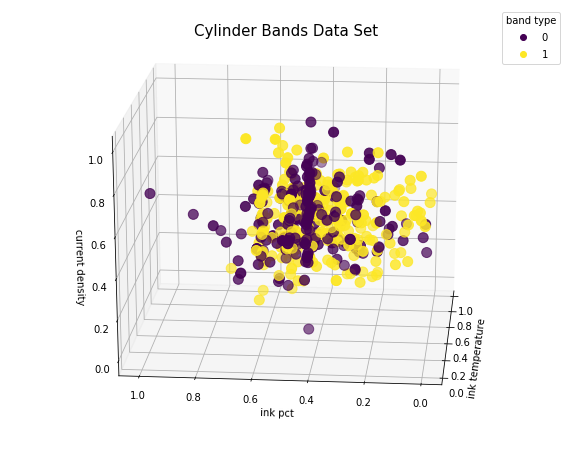

In [24]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')

xs = X_[:,0]
ys = X_[:,1]
zs = X_[:,2]
scatter = ax.scatter( xs, ys, zs, c=y,s=100 )
ax.set_xlabel('ink temperature')
ax.set_ylabel('ink pct')
ax.set_zlabel('current density')
ax.set_title('Cylinder Bands Data Set',fontsize=15)
ax.legend(*scatter.legend_elements(), loc="upper right", title = 'band type')
ax.view_init( azim=-175, elev=20 );

#### Задание 6.
Разбейте набор данных на обучающую и тестовую выборки. Постройте регрессоры на базе моделей регрессии, указанных в индивидуальном задании, для каждого из трех признаков. Определите оптимальные параметры регрессоров при помощи GridSearchCV.

*Регрессоры:* 

- *Полиномиальная регрессия (PolynomialFeatures+LinearRegression), параметр degree в диапазоне от 2 до 5* 

- *Регрессия эластичная сеть (ElasticNet), параметры alpha в диапазоне от 0.5 до 1.5, l1_ratio от 0.5 до 1.5* 

- *Регрессии на основе метода опорных векторов (SVR), параметр degree в диапазоне от 1 до 5* 

*Показатель качества регрессии для определения лучшего регрессора - MSPE*

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.25, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((404, 3), (404,), (135, 3), (135,))

Разобъем признаки:

In [26]:
X_train_1 = X_train[:,0]
X_test_1 = X_test[:,0]
X_train_1 = X_train_1[:, np.newaxis]
X_test_1 = X_test_1[:, np.newaxis]
X_train_1.shape, X_test_1.shape

((404, 1), (135, 1))

In [27]:
X_train_2 = X_train[:,1]
X_test_2 = X_test[:,1]
X_train_2 = X_train_2[:, np.newaxis]
X_test_2 = X_test_2[:, np.newaxis]
X_train_2.shape, X_test_2.shape

((404, 1), (135, 1))

In [28]:
X_train_3 = X_train[:,2]
X_test_3 = X_test[:,2]
X_train_3 = X_train_3[:, np.newaxis]
X_test_3 = X_test_3[:, np.newaxis]
X_train_3.shape, X_test_3.shape

((404, 1), (135, 1))

1. Полиномиальная регрессия (PolynomialFeatures+LinearRegression), параметр degree в диапазоне от 2 до 5

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("lin_reg", LinearRegression())
    ])

GridSearchCV для полиномиальной регрессии

In [30]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        "poly__degree": [i for i in range(2, 6)]
    }
]

Признак 1

In [31]:
poly_reg_1 = PolynomialRegression(degree=2)
poly_reg_1.fit(X_train_1, y_train);
grid_search_poly = GridSearchCV(poly_reg_1, param_grid, n_jobs=-1, verbose=1)
grid_search_poly.fit(X_train_1, y_train)
grid_search_poly.best_params_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


{'poly__degree': 3}

In [32]:
poly_reg_1 = PolynomialRegression(degree=3)
poly_reg_1.fit(X_train_1, y_train)
y_pred_p1 = poly_reg_1.predict(X_test_1)
mean_absolute_percentage_error(y_pred_p1, y_test)

0.8378409412978003

Признак 2

In [33]:
poly_reg_2 = PolynomialRegression(degree=2)
poly_reg_2.fit(X_train_2, y_train);

grid_search_poly = GridSearchCV(poly_reg_2, param_grid, n_jobs=-1, verbose=1)
grid_search_poly.fit(X_train_2, y_train)
grid_search_poly.best_params_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


{'poly__degree': 3}

In [34]:
poly_reg_2 = PolynomialRegression(degree=2)
poly_reg_2.fit(X_train_2, y_train)
y_pred_p2 = poly_reg_2.predict(X_test_2)
mean_absolute_percentage_error(y_pred_p2, y_test)

0.8528597951579789

Признак 3

In [35]:
poly_reg_3 = PolynomialRegression(degree=2)
poly_reg_3.fit(X_train_3, y_train);

grid_search_poly = GridSearchCV(poly_reg_3, param_grid, n_jobs=-1, verbose=1)
grid_search_poly.fit(X_train_3, y_train)
grid_search_poly.best_params_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


{'poly__degree': 2}

In [36]:
poly_reg_3 = PolynomialRegression(degree=2)
poly_reg_3.fit(X_train_3, y_train)
y_pred_p3 = poly_reg_3.predict(X_test_3)
mean_absolute_percentage_error(y_pred_p3, y_test)

0.8528200317901229

2. Регрессия эластичная сеть (ElasticNet), параметры alpha в диапазоне от 0.5 до 1.5, l1_ratio от 0.5 до 1.5

*error*  
l1_ratio must be between 0 and 1; got l1_ratio=(0.5, 1.5)

GridReasearch

In [37]:
param_grid = [
    {
        "alpha": [i*0.1 for i in range(5, 16)],
        "l1_ratio": [i*0.1 for i in range(5, 11)]
    }
]

Признак 1

In [38]:
from sklearn.linear_model import ElasticNet

elnet_reg_1 = ElasticNet()
elnet_reg_1.fit(X_train_1, y_train);

grid_search_elnet = GridSearchCV(elnet_reg_1, param_grid, n_jobs=-1, verbose=1)
grid_search_elnet.fit(X_train_1, y_train)
grid_search_elnet.best_params_

Fitting 5 folds for each of 66 candidates, totalling 330 fits


{'alpha': 0.5, 'l1_ratio': 0.5}

In [39]:
elnet_reg_1 = ElasticNet(alpha=0.5, l1_ratio=0.5)
elnet_reg_1.fit(X_train_1, y_train)
y_pred_el1 = elnet_reg_1.predict(X_test_1)
mean_absolute_percentage_error(y_pred_el1, y_test)

0.8521095008051531

Признак 2

In [40]:
elnet_reg_2 = ElasticNet()
elnet_reg_2.fit(X_train_2, y_train);

grid_search_elnet = GridSearchCV(elnet_reg_2, param_grid, n_jobs=-1, verbose=1)
grid_search_elnet.fit(X_train_2, y_train)
grid_search_elnet.best_params_

Fitting 5 folds for each of 66 candidates, totalling 330 fits


{'alpha': 0.5, 'l1_ratio': 0.5}

In [41]:
elnet_reg_2 = ElasticNet(alpha=0.5, l1_ratio=0.5)
elnet_reg_2.fit(X_train_2, y_train)
y_pred_el2 = elnet_reg_2.predict(X_test_2)
mean_absolute_percentage_error(y_pred_el2, y_test)

0.8521095008051531

Признак 3

In [42]:
elnet_reg_3 = ElasticNet()
elnet_reg_3.fit(X_train_3, y_train);

grid_search_elnet = GridSearchCV(elnet_reg_3, param_grid, n_jobs=-1, verbose=1)
grid_search_elnet.fit(X_train_3, y_train)
grid_search_elnet.best_params_

Fitting 5 folds for each of 66 candidates, totalling 330 fits


{'alpha': 0.5, 'l1_ratio': 0.5}

In [43]:
elnet_reg_3 = ElasticNet(alpha=0.5, l1_ratio=0.5)
elnet_reg_3.fit(X_train_3, y_train)
y_pred_el3 = elnet_reg_3.predict(X_test_3)
mean_absolute_percentage_error(y_pred_el3, y_test)

0.8521095008051531

3. Регрессии на основе метода опорных векторов (SVR), параметр degree в диапазоне от 1 до 5

In [44]:
param_grid3 = [
    {
        "degree": [i for i in range(1, 6)]
    }
]

Признак 1 

In [45]:
from sklearn.svm import SVR

svm_reg_1 = SVR(kernel='linear', degree=3)
svm_reg_1.fit(X_train_1, y_train)

grid_search_svm = GridSearchCV(svm_reg_1, param_grid3, n_jobs=-1, verbose=1)
grid_search_svm.fit(X_train_1, y_train)
grid_search_svm.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


{'degree': 1}

In [46]:
svm_reg_1 = SVR(kernel='linear',degree=1)
svm_reg_1.fit(X_train_1, y_train)
y_pred_svm1 = svm_reg_1.predict(X_test_1)
mean_absolute_percentage_error(y_pred_svm1, y_test)

0.4600821775685595

Признак 2

In [47]:
from sklearn.svm import SVR

svm_reg_2 = SVR(kernel='linear',degree=3)
svm_reg_2.fit(X_train_2, y_train)

grid_search_svm = GridSearchCV(svm_reg_2, param_grid3, n_jobs=-1, verbose=1)
grid_search_svm.fit(X_train_2, y_train)
grid_search_svm.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


{'degree': 1}

In [48]:
svm_reg_2 = SVR(kernel='linear',degree=1)
svm_reg_2.fit(X_train_2, y_train)
y_pred_svm2 = svm_reg_2.predict(X_test_2)
mean_absolute_percentage_error(y_pred_svm2, y_test)

0.4600822134876599

Признак 3

In [49]:
from sklearn.svm import SVR

svm_reg_3 = SVR(kernel='linear',degree=3)
svm_reg_3.fit(X_train_3, y_train)

grid_search_svm = GridSearchCV(svm_reg_3, param_grid3, n_jobs=-1, verbose=1)
grid_search_svm.fit(X_train_3, y_train)
grid_search_svm.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


{'degree': 1}

In [50]:
svm_reg_3 = SVR(kernel='linear',degree=1)
svm_reg_3.fit(X_train_3, y_train)
y_pred_svm3 = svm_reg_3.predict(X_test_3)
mean_absolute_percentage_error(y_pred_svm3, y_test)

0.4600823054329663

#### Задание 7.
Для каждого из трех признаков визуализируйте на плоскости набор данных одним цветом и линии регрессии для регрессоров с оптимальными параметрами, определенными в п. 6 (всего три рисунка). Регрессоры, имеющие максимальное значение показателя качества регрессии, указанного в индивидуальном задании, выделите красным цветом. В качестве подписи оси X используйте название признака, в качестве подписи оси Y – название столбца с откликами. Создайте легенду для линий регрессии.

In [51]:
X0 = X_[:,0].reshape(-1,1)
y_pred_p1_ = poly_reg_1.predict(X0)
y_pred_el1_ = elnet_reg_1.predict(X0)
y_pred_svm1_ = svm_reg_1.predict(X0)

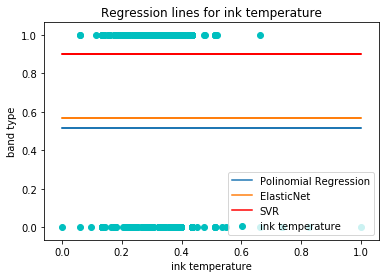

In [52]:
plt.scatter(X0, y, color='c', label="ink temperature")
plt.plot(np.sort(X0), y_pred_p1_[np.argsort(X0)], label="Polinomial Regression")
plt.plot(np.sort(X0), y_pred_el1_[np.argsort(X0)], label="ElasticNet")
plt.plot(np.sort(X0), y_pred_svm1_[np.argsort(X0)], label="SVR", color='r')
plt.legend()
plt.title('Regression lines for ink temperature')
plt.xlabel('ink temperature')
plt.ylabel('band type')
plt.show()

In [53]:
X1 = X_[:,1].reshape(-1,1)
y_pred_p2_ = poly_reg_2.predict(X1)
y_pred_el2_ = elnet_reg_2.predict(X1)
y_pred_svm2_ = svm_reg_2.predict(X1)

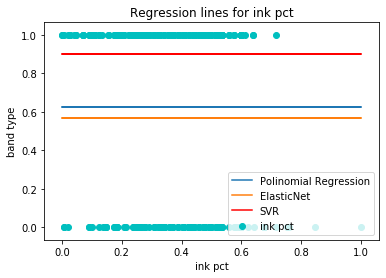

In [54]:
plt.scatter(X1, y, color='c', label="ink pct")
plt.plot(np.sort(X1), y_pred_p2_[np.argsort(X1)], label="Polinomial Regression")
plt.plot(np.sort(X1), y_pred_el2_[np.argsort(X1)], label="ElasticNet")
plt.plot(np.sort(X1), y_pred_svm2_[np.argsort(X1)], label="SVR", color='r')
plt.legend()
plt.title('Regression lines for ink pct')
plt.xlabel('ink pct')
plt.ylabel('band type')
plt.show()

In [55]:
X2 = X_[:,2].reshape(-1,1)
y_pred_p3_ = poly_reg_3.predict(X2)
y_pred_el3_ = elnet_reg_3.predict(X2)
y_pred_svm3_ = svm_reg_3.predict(X2)

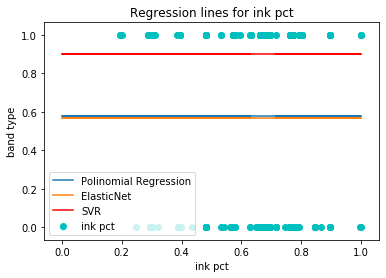

In [56]:
plt.scatter(X2, y, color='c', label="ink pct")
plt.plot(np.sort(X2), y_pred_p3_[np.argsort(X2)], label="Polinomial Regression")
plt.plot(np.sort(X2), y_pred_el3_[np.argsort(X2)], label="ElasticNet")
plt.plot(np.sort(X2), y_pred_svm3_[np.argsort(X2)], label="SVR", color='r')
plt.legend()
plt.title('Regression lines for ink pct')
plt.xlabel('ink pct')
plt.ylabel('band type')
plt.show()

#### Задание 8.	
Постройте на одном рисунке кривые обучения (зависимость показателя качества регрессии, указанного в индивидуальном задании, от количества точек в обучающей выборке) для трех лучших регрессоров для каждого из трех признаков по показателю качества, указанному в индивидуальном задании. Кривые для регрессора с максимальным показателем качества визуализируйте красным цветом (кривую для обучающей выборки сплошной линией, кривую для тестовой выборки линией из точек). Подпишите корректно оси и создайте легенду для кривых обучения.

*Показатель качества регрессии для визуализации кривой обучения - MSLE*.

In [57]:
from sklearn.metrics import mean_squared_log_error

In [83]:
def plot_learning_curve(algo1, algo2, algo3, X_train, X_test, y_train, y_test, axis=[0, len(X_train)+1, 0.3, 0.6]):
    train_score1 = []
    test_score1 = []
    train_score2 = []
    test_score2 = []
    train_score3 = []
    test_score3 = []
    xtr1 = X_train[:,0].reshape(-1, 1)
    xtr2 = X_train[:,1].reshape(-1, 1)
    xtr3 = X_train[:,2].reshape(-1, 1)
    xe1 = X_test[:,0].reshape(-1, 1)
    xe2 = X_test[:,1].reshape(-1, 1)
    xe3 = X_test[:,2].reshape(-1, 1)
    for i in range(1, len(xtr1)+1):
        algo1.fit(xtr1[:i], y_train[:i])
    
        y_train_predict = algo1.predict(xtr1[:i])
        train_score1.append(mean_squared_log_error(y_train[:i], y_train_predict))
    
        y_test_predict = algo1.predict(xe1)
        test_score1.append(mean_squared_log_error(y_test, y_test_predict))
    
    for i in range(1, len(xtr2)+1):
        algo2.fit(xtr2[:i], y_train[:i])
    
        y_train_predict = algo2.predict(xtr2[:i])
        train_score2.append(mean_squared_log_error(y_train[:i], y_train_predict))
    
        y_test_predict = algo2.predict(xe2)
        test_score2.append(mean_squared_log_error(y_test, y_test_predict))
        
    for i in range(1, len(xtr3)+1):
        algo3.fit(xtr3[:i], y_train[:i])
    
        y_train_predict = algo3.predict(xtr3[:i])
        train_score3.append(mean_squared_log_error(y_train[:i], y_train_predict))
    
        y_test_predict = algo3.predict(xe3)
        test_score3.append(mean_squared_log_error(y_test, y_test_predict))
        
    plt.plot([i for i in range(1, len(xtr1)+1)], 
                               np.sqrt(train_score1), label="Train first feature", color="r", linewidth=1)
    plt.plot([i for i in range(1, len(xtr1)+1)], 
                               np.sqrt(test_score1), label="Test first feature", color="r", linestyle='dashed', linewidth=1)
    plt.plot([i for i in range(1, len(xtr2)+1)], 
                               np.sqrt(train_score2), label="Train second feature", color="b", linewidth=1)
    plt.plot([i for i in range(1, len(xtr2)+1)], 
                               np.sqrt(test_score2), label="Test second feature", color="b", linestyle='dashed', linewidth=1, alpha=0.5)
    plt.plot([i for i in range(1, len(xtr3)+1)], 
                               np.sqrt(train_score3), label="Train third feature", color="g", linewidth=1)
    plt.plot([i for i in range(1, len(xtr3)+1)], 
                               np.sqrt(test_score3), label="Test third feature", color="g", linestyle='dashed', linewidth=1, alpha=0.2)
    plt.legend(loc='upper right')
    plt.xlabel('Training set size')
    plt.ylabel('Error')
    plt.axis(axis) 
    plt.show()

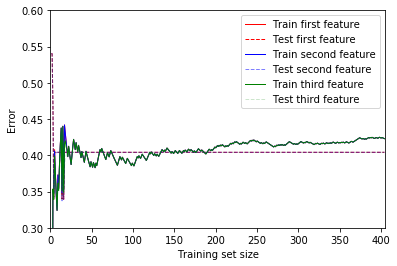

In [84]:
plot_learning_curve(svm_reg_1, svm_reg_2, svm_reg_3, X_train, X_test, y_train, y_test)

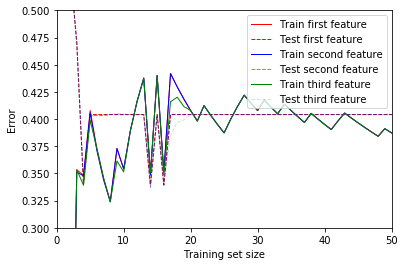

In [80]:
plot_learning_curve(svm_reg_1, svm_reg_2, svm_reg_3, X_train, X_test, y_train, y_test, [0, 50, 0.3, 0.5])